# How to Train YOLOv5 on Custom Objects

[COLAB LINK](https://drive.google.com/file/d/16ljl74QxZz0fzeHqYcS1fMrVNaYMqtPL/view?usp=sharing)

<font color='red'>IMPORTANT! THIS NOTEBOOK WAS RUN ON YANDEX DATASPHERE. IF YOU NEED TO RUN IT IN COLAB PLEASE CHANGE ALL THE DIRECTORIES PATHS!</font>

This notebook is based on the [Roboflow tutorial](https://colab.research.google.com/drive/1gDZ2xcTOgR39tGGs-EZ6i3RTs16wmzZQ). This notebook shows training on **your own custom objects**. Many thanks to Ultralytics for putting this repository together - we hope that in combination with clean data management tools at Roboflow, this technologoy will become easily accessible to any developer wishing to use computer vision in their projects.

### Steps

To train the detector we take the following steps:

* Install YOLOv5 dependencies
* Download custom YOLOv5 object detection data
* Write our YOLOv5 Training configuration
* Run YOLOv5 training
* Evaluate YOLOv5 performance
* Visualize YOLOv5 training data
* Run YOLOv5 inference on test images

# Install Dependencies


In [ ]:
# clone YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
# !git reset --hard 886f1c03d839575afecb059accf74296fad395b6

Cloning into 'yolov5'...
remote: Enumerating objects: 10245, done.
remote: Total 10245 (delta 0), reused 0 (delta 0), pack-reused 10245
Receiving objects: 100% (10245/10245), 10.40 MiB | 23.77 MiB/s, done.
Resolving deltas: 100% (7113/7113), done.
/home/jupyter/work/resources/yolov5


In [ ]:
#!g1.1
# install dependencies as necessary
%pip install -qr requirements.txt  # install dependencies (ignore errors)
import torch

from IPython.display import Image, clear_output  # to display images
from utils.google_utils import gdrive_download  # to download models/datasets

# clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

UsageError: Line magic function `%pip3` not found.


UsageError: Line magic function `%pip3` not found.

# Dataset

In [ ]:
%pip install roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="1S2fSLc6ftGebwFa2pPH")
project = rf.workspace().project("cv-ass2")
dataset = project.version(1).download("yolov5")

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 145 kB 3.0 MB/s 
     |████████████████████████████████| 1.1 MB 17.9 MB/s 
     |████████████████████████████████| 138 kB 76.9 MB/s 
  Created wheel for roboflow: filename=roboflow-0.2.0-py3-none-any.whl size=20124 sha256=e4cbfdf6ca93e6fc853deda4fbe1a6fc2330eb7d3fa87f9935ba7be27c9c93f6
  Stored in directory: /tmp/xdg_cache/pip/wheels/9c/fe/2a/ae748046c4c8f06d006de5df1a1774a3d099133d2824ef38a7
Successfully built roboflow
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spacy 3.1.1 requires typing-extensions<4.0.0.0,>=3.7.4; python_version < "3.8", but you have typing-extensions 4.0.0 which is incompatible.
moto 1.3.14 requires idna<2

Extracting Dataset Version Zip to cv-ass2-1 in yolov5pytorch:: 100%|██████████| 345/345 [00:00<00:00, 610.76it/s]


In [ ]:
#%cd /content/yolov5
%cd /home/jupyter/work/resources/yolov5
#after following the link above, recieve python code with these fields filled in
#from roboflow import Roboflow
#rf = Roboflow(api_key="YOUR API KEY HERE")
#project = rf.workspace().project("YOUR PROJECT")
#dataset = project.version("YOUR VERSION").download("yolov5")

/home/jupyter/work/resources/yolov5


In [ ]:
# this is the YAML file Roboflow wrote for us that we're loading into this notebook with our data
%cat {dataset.location}/data.yaml

names:
- camera
- smokedet
nc: 2
train: cv-ass2-1/train/images
val: cv-ass2-1/valid/images


In [ ]:
#this is the model configuration we will use for our tutorial 
#%cat /content/yolov5/models/yolov5s.yaml

# Train Custom YOLOv5 Detector

### Next, we'll fire off training!


Here, we are able to pass a number of arguments:
- **img:** define input image size
- **batch:** determine batch size
- **epochs:** define the number of training epochs. (Note: often, 3000+ are common here!)
- **data:** set the path to our yaml file
- **cfg:** specify our model configuration
- **weights:** specify a custom path to weights. (Note: you can download weights from the Ultralytics Google Drive [folder](https://drive.google.com/open?id=1Drs_Aiu7xx6S-ix95f9kNsA6ueKRpN2J))
- **name:** result names
- **nosave:** only save the final checkpoint
- **cache:** cache images for faster training

In [ ]:
#!g1.1
# train yolov5s on custom data for 100 epochs
# time its performance
#%%time
# %cd /content/yolov5/
!python3 train.py --img 416 --batch 16 --epochs 100 --data cv-ass2-1/data.yaml --cfg ./models/custom_yolov5s.yaml --weights yolov5s.pt --name yolov5s_results  --cache

train: weights=yolov5s.pt, cfg=./models/custom_yolov5s.yaml, data=cv-ass2-1/data.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=100, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, name=yolov5s_results, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.0-122-gd885799 torch 1.10.0+cu102 CUDA:0 (Tesla V100-PCIE-32GB, 32510MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=

# Evaluate Custom YOLOv5 Detector Performance

Training losses and performance metrics are saved to Tensorboard and also to a logfile defined above with the **--name** flag when we train. In our case, we named this `yolov5s_results`. (If given no name, it defaults to `results.txt`.) The results file is plotted as a png after training completes.

Note from Glenn: Partially completed `results.txt` files can be plotted with `from utils.utils import plot_results; plot_results()`.

In [ ]:
# Start tensorboard
# Launch after you have started training
# logs save in the folder "runs"
%load_ext tensorboard
%tensorboard --logdir runs

In [ ]:
# we can also output some older school graphs if the tensor board isn't working for whatever reason... 
from utils.plots import plot_results  # plot results.txt as results.png
Image(filename='yolov5/runs/train/yolov5s_results/results.png', width=1000)  # view results.png

ModuleNotFoundError: No module named 'utils'

### Curious? Visualize Our Training Data with Labels

After training starts, view `train*.jpg` images to see training images, labels and augmentation effects.

Note a mosaic dataloader is used for training (shown below), a new dataloading concept developed by Glenn Jocher and first featured in [YOLOv4](https://arxiv.org/abs/2004.10934).

In [ ]:
# first, display our ground truth data
print("GROUND TRUTH TRAINING DATA:")
Image(filename='/content/yolov5/runs/train/yolov5s_results2/test_batch0_labels.jpg', width=900)

In [ ]:
# print out an augmented training example
print("GROUND TRUTH AUGMENTED TRAINING DATA:")
Image(filename='/content/yolov5/runs/train/yolov5s_results2/train_batch0.jpg', width=900)

#Run Inference  With Trained Weights
Run inference with a pretrained checkpoint on contents of `test/images` folder downloaded from Roboflow.

In [ ]:
# trained weights are saved by default in our weights folder
%ls runs/

train/


In [ ]:
%ls runs/train/yolov5s_results/weights

best.pt  last.pt


In [ ]:
# when we ran this, we saw .007 second inference time. That is 140 FPS on a TESLA P100!
# use the best weights!
!python3 detect.py --weights runs/train/yolov5s_results/weights/last.pt --img 416 --conf 0.4 --source cv-ass2-1/valid/images

detect: weights=['runs/train/yolov5s_results/weights/last.pt'], source=cv-ass2-1/valid/images, imgsz=[416, 416], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-122-gd885799 torch 1.10.0+cu102 CPU

Fusing layers... 
Model Summary: 213 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/17 /home/jupyter/work/resources/yolov5/cv-ass2-1/valid/images/IMG20211203223758_jpg.rf.c59f5b3b3619416c2795a50230948c9a.jpg: 416x416 1 smokedet, Done. (0.085s)
image 2/17 /home/jupyter/work/resources/yolov5/cv-ass2-1/valid/images/IMG20211203224056_jpg.rf.8e40254245a949c8a0c3ebfd6bd4891c.jpg: 416x416 1 smokedet, Done. (0.071s)
image 3/17 /home/jupyter/work/resources/yolov5/cv-ass2-1/valid/images/IM

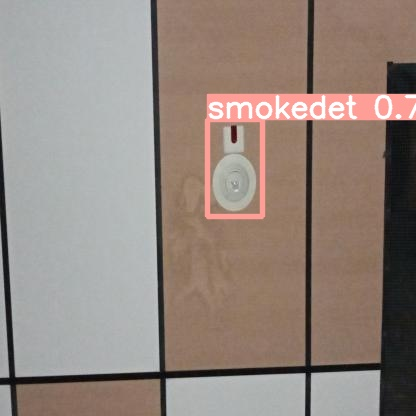

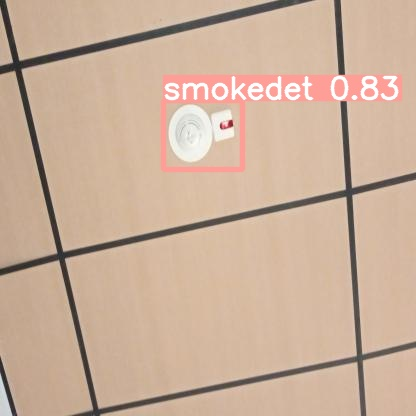

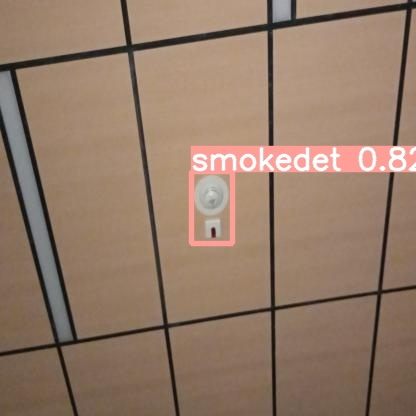

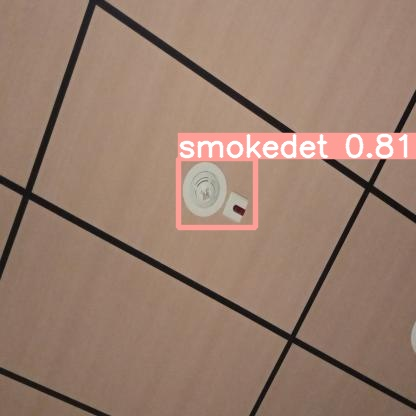

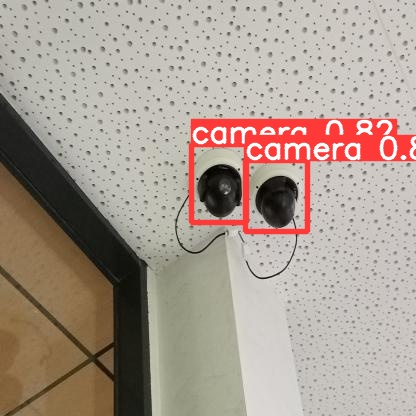

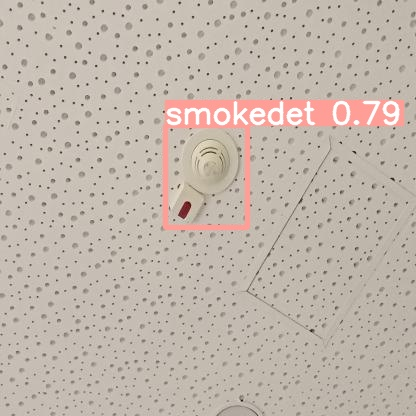

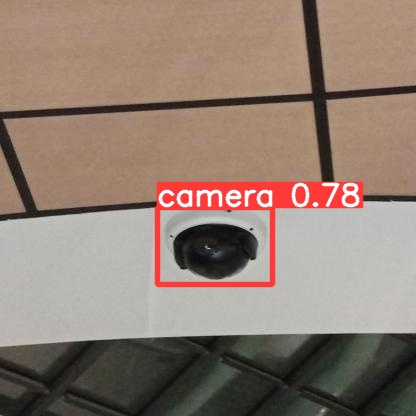

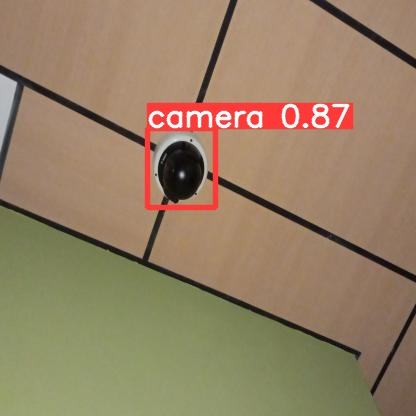

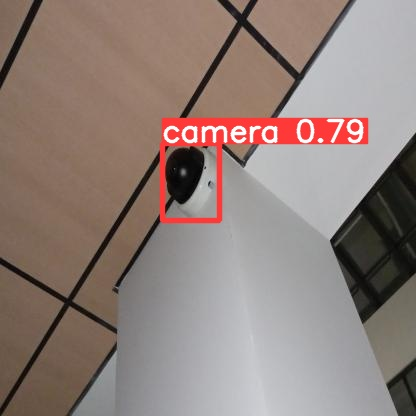

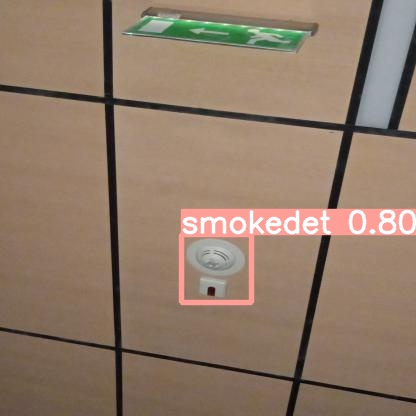

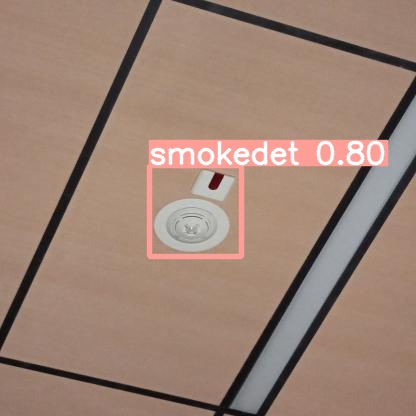

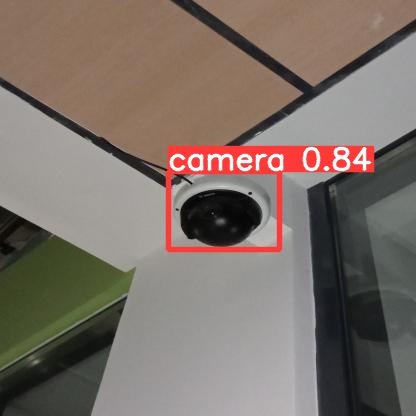

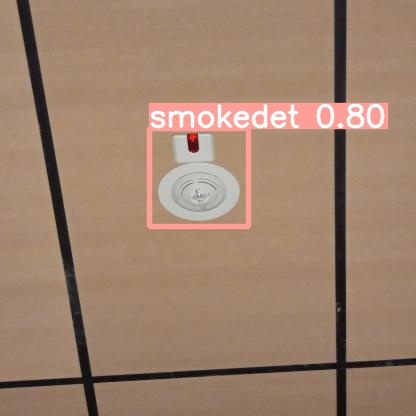

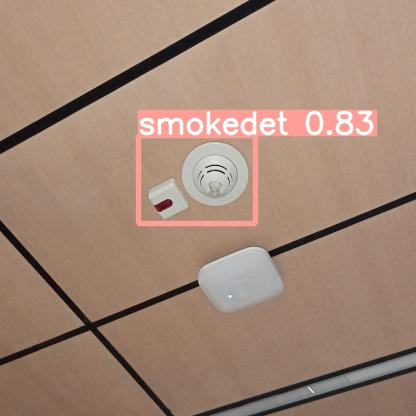

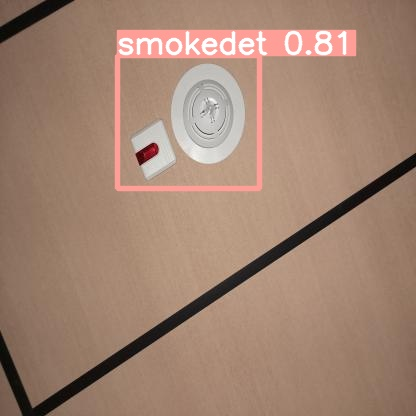

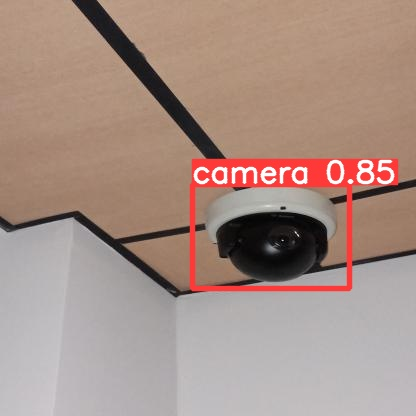

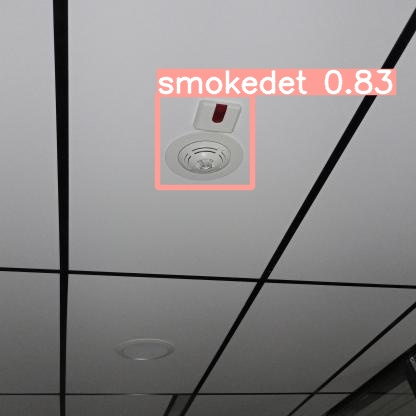

In [ ]:
#display inference on ALL test images
#this looks much better with longer training above

import glob
from IPython.display import Image, display

for imageName in glob.glob('/home/jupyter/work/resources/yolov5/runs/detect/exp2/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")